# Sentiment Analysis of Financial News Headlines
## This task tests your ability to apply NLP techniques you've learnt to classify a news headline containing financial information into either one of the sentiments (Positive, Negative or Neutral)

### Dataset:
https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv

## Max Marks without Bonus attempted: 80 points
## Max Marks with Bonus: 100 points
- ### Bonus: 20 points

### Steps
- 1. Download the dataset
- 2. Load the dataset
- 3. Explore the dataset (Exploratory Data Analysis)
- 4. Clean the data
- 5. Apply SMOTE for imbalanced data [Optional] --> Carries Bonus Marks
- 6. Build a BoW model
- 7. Build a Tf-Idf model
- 8. Split train and test data
- 9. Use one ML Classifying algorithm to classify the finanical news headline data
- 10. Use another ML classifying algorithm to classify them
- 11. Plot Confusion matrix

## 1. Download the dataset [1 point]

In [41]:
!wget https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv -O financial_news_headlines_sentiment.csv
print("Dataset downloaded successfully as financial_news_headlines_sentiment.csv")

--2025-11-22 00:57:20--  https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 672006 (656K) [application/octet-stream]
Saving to: ‘financial_news_headlines_sentiment.csv’

financial_news_head 100%[===================>] 656.26K  --.-KB/s    in 0.06s   

2025-11-22 00:57:21 (9.88 MB/s) - ‘financial_news_headlines_sentiment.csv’ saved [672006/672006]

Dataset downloaded successfully as financial_news_headlines_sentiment.csv


## 2. Load the dataset [1 point]

In [42]:
import pandas as pd
df = pd.read_csv('financial_news_headlines_sentiment.csv', encoding='latin1')
print("Dataset loaded successfully.")
df.head()

Dataset loaded successfully.


,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


## 3. Explore the dataset [10 points]

In [43]:
df.columns = ['sentiment', 'headline']
print("Columns renamed successfully.")
df.head()

Columns renamed successfully.


,sentiment,headline
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [44]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
sentiment    0
headline     0
dtype: int64


In [45]:
print("Distribution of sentiments:")
print(df['sentiment'].value_counts())

Distribution of sentiments:
sentiment
neutral     2878
positive    1363
negative     604
Name: count, dtype: int64


In [46]:
df['headline_length'] = df['headline'].apply(len)
print("Headline lengths calculated and added as 'headline_length' column.")
df.head()

Headline lengths calculated and added as 'headline_length' column.


,sentiment,headline,headline_length
0,neutral,Technopolis plans to develop in stages an area...,190
1,negative,The international electronic industry company ...,228
2,positive,With the new production plant the company woul...,206
3,positive,According to the company 's updated strategy f...,203
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,178


In [47]:
print("Descriptive statistics for headline_length:")
print(df['headline_length'].describe())

Descriptive statistics for headline_length:
count    4845.000000
mean      128.132301
std        56.532012
min         9.000000
25%        84.000000
50%       119.000000
75%       163.000000
max       315.000000
Name: headline_length, dtype: float64


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Matplotlib and Seaborn imported successfully.")

Matplotlib and Seaborn imported successfully.


/tmp/ipython-input-2072590484.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


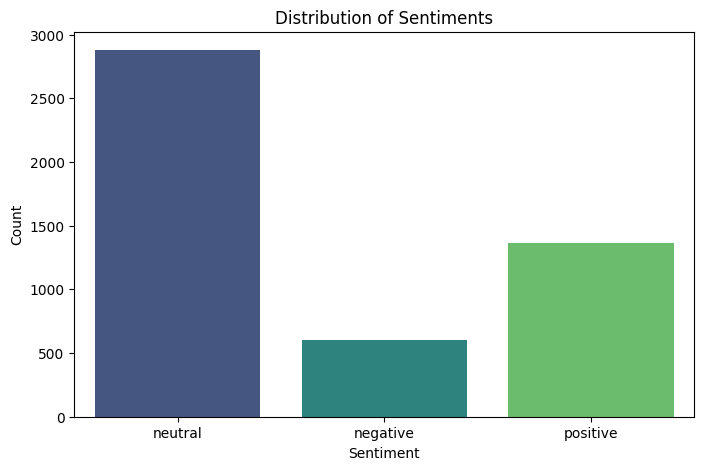

Count plot of sentiment distribution displayed.


In [49]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
print("Count plot of sentiment distribution displayed.")

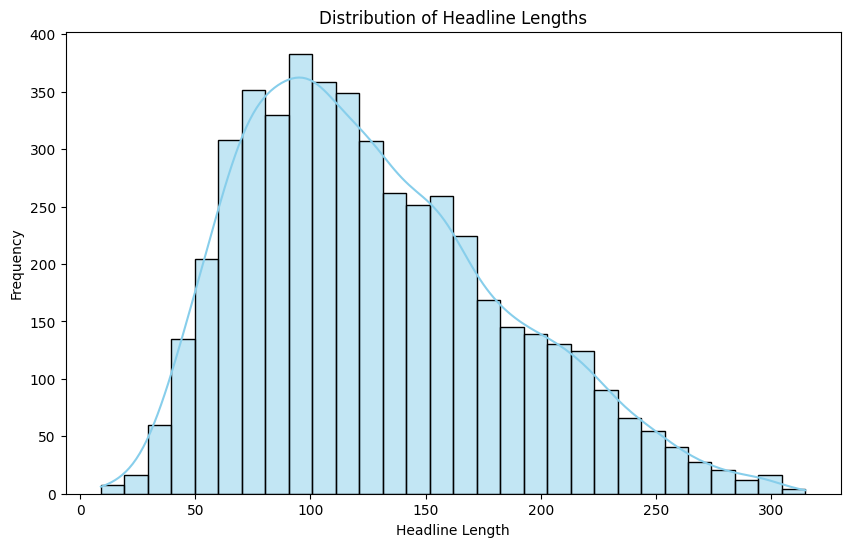

Histogram of headline lengths displayed.


In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()
print("Histogram of headline lengths displayed.")

## 4. Clean the data [5 points]

In [51]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

print("Necessary libraries imported: re, nltk, WordNetLemmatizer, stopwords.")

Necessary libraries imported: re, nltk, WordNetLemmatizer, stopwords.


In [52]:
import string
nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
print("NLTK stopwords and wordnet downloaded, and WordNetLemmatizer initialized.")

NLTK stopwords and wordnet downloaded, and WordNetLemmatizer initialized.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


the necessary NLTK resources are loaded, I will define the `clean_text` function to preprocess the headlines and apply it to create a new `cleaned_headline` column.



In [53]:
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = text.lower() # Convert to lowercase
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text) # Remove punctuation
    text = re.sub(r'\d+', '', text) # Remove numbers
    words = text.split() # Tokenize
    words = [word for word in words if word not in stop_words] # Remove stopwords
    words = [lemmatizer.lemmatize(word) for word in words] # Lemmatize
    return ' '.join(words) # Join words back into a string

df['cleaned_headline'] = df['headline'].apply(clean_text)
print("Text cleaning applied and 'cleaned_headline' column created.")
df.head()

Text cleaning applied and 'cleaned_headline' column created.


,sentiment,headline,headline_length,cleaned_headline
0,neutral,Technopolis plans to develop in stages an area...,190,technopolis plan develop stage area less squar...
1,negative,The international electronic industry company ...,228,international electronic industry company elco...
2,positive,With the new production plant the company woul...,206,new production plant company would increase ca...
3,positive,According to the company 's updated strategy f...,203,according company updated strategy year baswar...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,178,financing aspocomp growth aspocomp aggressivel...


## 6. BoW model [15 points]

In [54]:
from imblearn.over_sampling import SMOTE

smo = SMOTE(random_state=42)
X_train_bow_smote, y_train_bow_smote = smo.fit_resample(X_train_bow, y_train_bow)

print("SMOTE applied to BoW training data successfully.")
print(f"Original BoW training data shape: {X_train_bow.shape}, {y_train_bow.shape}")
print(f"SMOTE-augmented BoW training data shape: {X_train_bow_smote.shape}, {y_train_bow_smote.shape}")

SMOTE applied to BoW training data successfully.
Original BoW training data shape: (3876, 8528), (3876,)
SMOTE-augmented BoW training data shape: (6906, 8528), (6906,)


## 7. Tf-idf model [15 points]

In [55]:
from imblearn.over_sampling import SMOTE

smo = SMOTE(random_state=42)
X_train_tfidf_smote, y_train_tfidf_smote = smo.fit_resample(X_train_tfidf, y_train_tfidf)

print("SMOTE applied to TF-IDF training data successfully.")
print(f"Original TF-IDF training data shape: {X_train_tfidf.shape}, {y_train_tfidf.shape}")
print(f"SMOTE-augmented TF-IDF training data shape: {X_train_tfidf_smote.shape}, {y_train_tfidf_smote.shape}")

SMOTE applied to TF-IDF training data successfully.
Original TF-IDF training data shape: (3876, 8528), (3876,)
SMOTE-augmented TF-IDF training data shape: (6906, 8528), (6906,)



To verify the success of the SMOTE process, I will print the class distribution of the SMOTE-augmented BoW and TF-IDF training target variables and the mapping of encoded labels to sentiment names.



In [56]:
import pandas as pd

print("Class distribution for y_train_bow_smote:")
print(pd.Series(y_train_bow_smote).value_counts())

print("\nClass distribution for y_train_tfidf_smote:")
print(pd.Series(y_train_tfidf_smote).value_counts())

print("\nMapping of encoded labels to sentiment names:")
print(list(label_encoder.classes_))

Class distribution for y_train_bow_smote:
2    2302
1    2302
0    2302
Name: count, dtype: int64

Class distribution for y_train_tfidf_smote:
2    2302
1    2302
0    2302
Name: count, dtype: int64

Mapping of encoded labels to sentiment names:
['negative', 'neutral', 'positive']


## 9. Classification Algorithm [10 points]
- Train
- Predict


To classify with the first algorithm (Logistic Regression) after SMOTE, I will import the model, initialize it, then train and predict using the SMOTE-augmented BoW and TF-IDF training data, and the original test data respectively.



In [57]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
log_reg_smote_model = LogisticRegression(max_iter=1000, random_state=42)
print("Logistic Regression model initialized for SMOTE data.")

# Train and predict with SMOTE-augmented BoW data
log_reg_smote_model.fit(X_train_bow_smote, y_train_bow_smote)
y_pred_bow_lr_smote = log_reg_smote_model.predict(X_test_bow)
print("Logistic Regression trained and predictions made on SMOTE-augmented BoW data.")

# Train and predict with SMOTE-augmented TF-IDF data
log_reg_smote_model.fit(X_train_tfidf_smote, y_train_tfidf_smote)
y_pred_tfidf_lr_smote = log_reg_smote_model.predict(X_test_tfidf)
print("Logistic Regression trained and predictions made on SMOTE-augmented TF-IDF data.")

Logistic Regression model initialized for SMOTE data.
Logistic Regression trained and predictions made on SMOTE-augmented BoW data.
Logistic Regression trained and predictions made on SMOTE-augmented TF-IDF data.


## 10. Another Classification Algorithm [10 points]
- Train
- Predict

## Classify with Algorithm 2 (with SMOTE)

### Subtask:
Train the second machine learning classification algorithm (Naive Bayes) on both the SMOTE-augmented BoW and TF-IDF training data and make predictions on the respective test sets.


In [58]:
from sklearn.naive_bayes import MultinomialNB

# Initialize Naive Bayes model
nb_smote_model = MultinomialNB()
print("Multinomial Naive Bayes model initialized for SMOTE data.")

# Train and predict with SMOTE-augmented BoW data
nb_smote_model.fit(X_train_bow_smote, y_train_bow_smote)
y_pred_bow_nb_smote = nb_smote_model.predict(X_test_bow)
print("Multinomial Naive Bayes trained and predictions made on SMOTE-augmented BoW data.")

# Train and predict with SMOTE-augmented TF-IDF data
nb_smote_model.fit(X_train_tfidf_smote, y_train_tfidf_smote)
y_pred_tfidf_nb_smote = nb_smote_model.predict(X_test_tfidf)
print("Multinomial Naive Bayes trained and predictions made on SMOTE-augmented TF-IDF data.")

Multinomial Naive Bayes model initialized for SMOTE data.
Multinomial Naive Bayes trained and predictions made on SMOTE-augmented BoW data.
Multinomial Naive Bayes trained and predictions made on SMOTE-augmented TF-IDF data.


## 11. Confusion Matrixes for two classification algorithms and two feature extractor methods [10 points]

## Ploting Confusion Matrices for SMOTE-augmented models




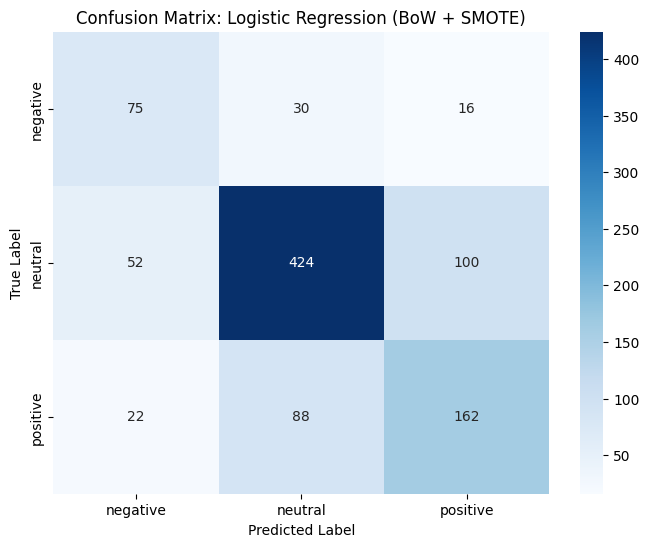

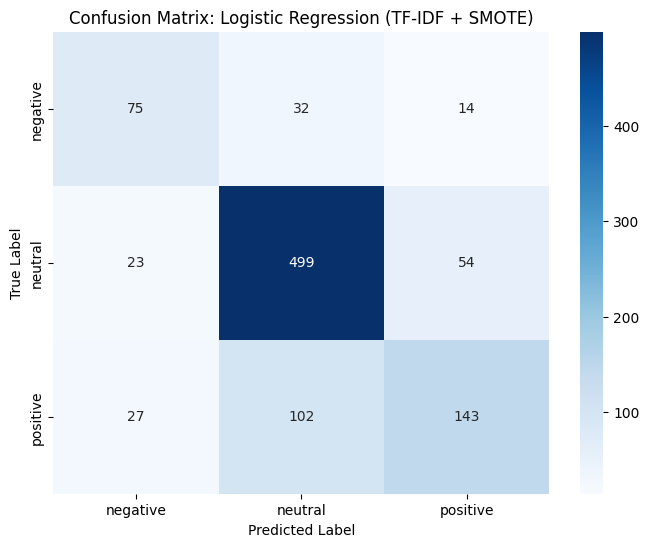

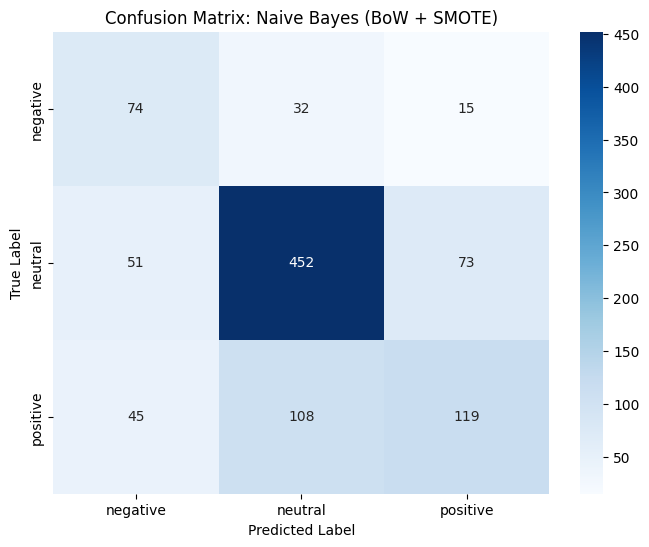

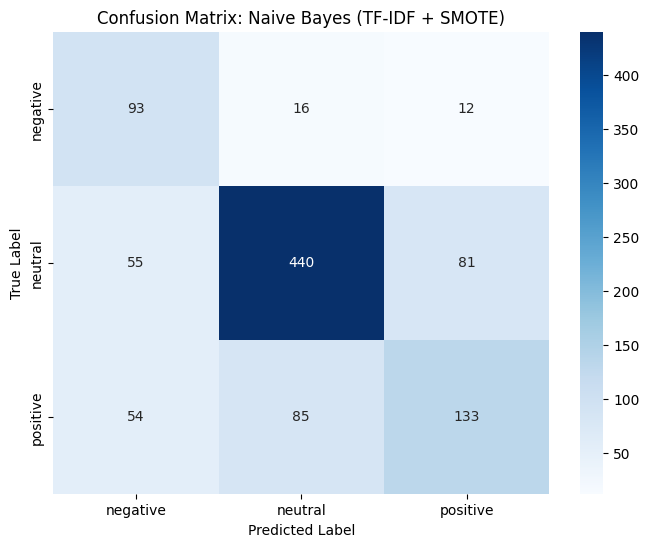

Confusion matrices for SMOTE-augmented models generated and displayed.


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Get class labels from the label_encoder
# Assuming label_encoder and class_labels are available from previous steps

# Plot Confusion Matrix for Logistic Regression with BoW (SMOTE)
plot_confusion_matrix(y_test_bow, y_pred_bow_lr_smote, 'Confusion Matrix: Logistic Regression (BoW + SMOTE)', class_labels)

# Plot Confusion Matrix for Logistic Regression with TF-IDF (SMOTE)
plot_confusion_matrix(y_test_tfidf, y_pred_tfidf_lr_smote, 'Confusion Matrix: Logistic Regression (TF-IDF + SMOTE)', class_labels)

# Plot Confusion Matrix for Naive Bayes with BoW (SMOTE)
plot_confusion_matrix(y_test_bow, y_pred_bow_nb_smote, 'Confusion Matrix: Naive Bayes (BoW + SMOTE)', class_labels)

# Plot Confusion Matrix for Naive Bayes with TF-IDF (SMOTE)
plot_confusion_matrix(y_test_tfidf, y_pred_tfidf_nb_smote, 'Confusion Matrix: Naive Bayes (TF-IDF + SMOTE)', class_labels)

print("Confusion matrices for SMOTE-augmented models generated and displayed.")